# DeepCall

Step 1: Feature Extraction - after collection audio data, extract the features  
Step 2: Speaker Clustering - identify who is speaker 1 and who is speaker 2  
Step 3: Training - train your model to classify the data into: Speech, Laughter, Silence, Filler Words  
Step 4: User Study

In [2]:
from pydub import AudioSegment
sound = AudioSegment.from_wav("Aubrey de Grey - Immortality Timeframe.wav")
sound = sound.set_channels(1)
sound.export("Aubrey.wav", format="wav")

C:\Users\Pluto\Anaconda3\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


<_io.BufferedRandom name='Aubrey.wav'>

In [15]:
sound = AudioSegment.from_wav("Tekking.wav")
sound = sound.set_channels(1)
sound.export("Tekking.wav", format="wav")

<_io.BufferedRandom name='Tekking.wav'>

In [3]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import audioFeatureExtraction
import matplotlib.pyplot as plt

frame_size = 0.050
frame_step = 0.025

[Fs, x] = audioBasicIO.readAudioFile("Aubrey.wav");
F, f_names = audioFeatureExtraction.stFeatureExtraction(x, Fs, frame_size*Fs, frame_step*Fs);

In [4]:
[Fs, x] = audioBasicIO.readAudioFile("Tekking.wav");
F_tekking, f_names_tekking = audioFeatureExtraction.stFeatureExtraction(x, Fs, frame_size*Fs, frame_step*Fs);

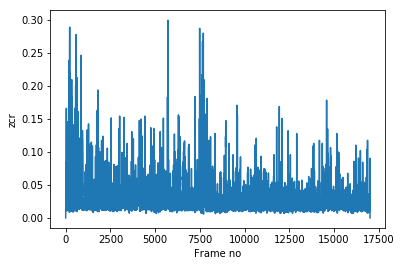

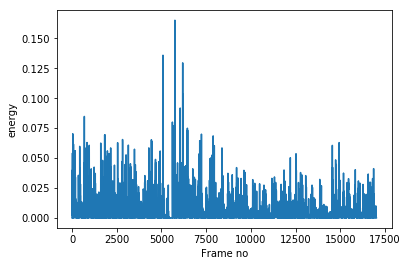

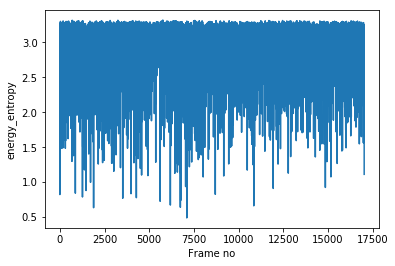

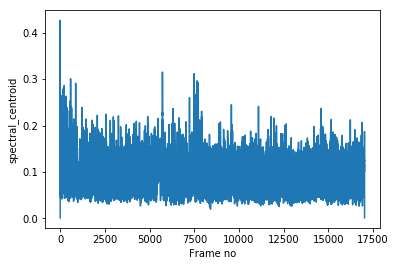

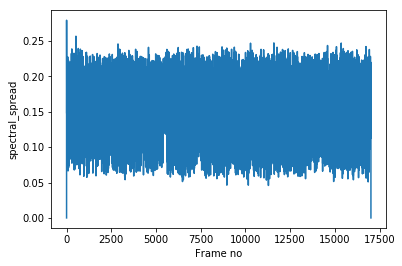

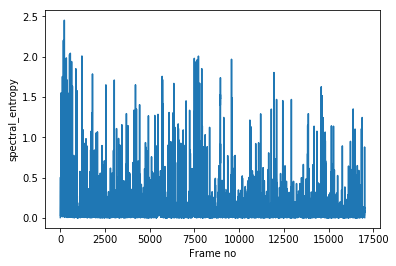

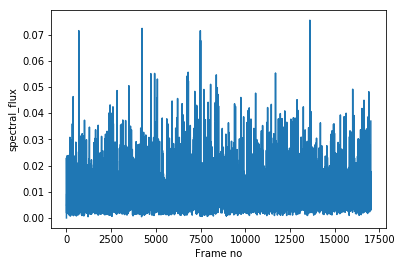

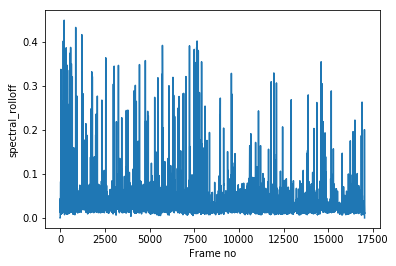

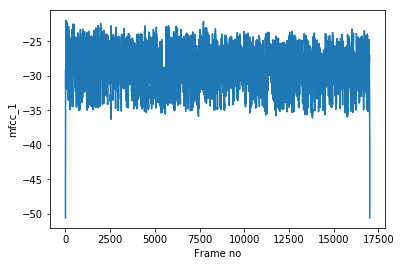

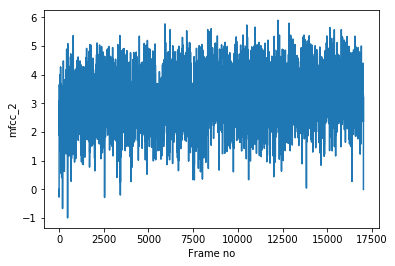

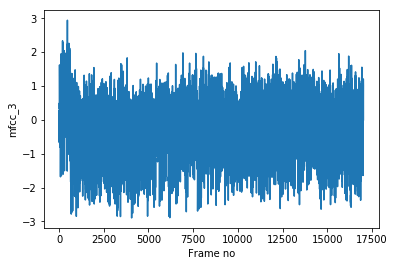

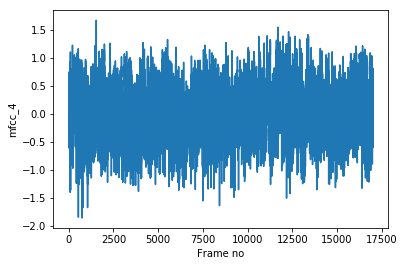

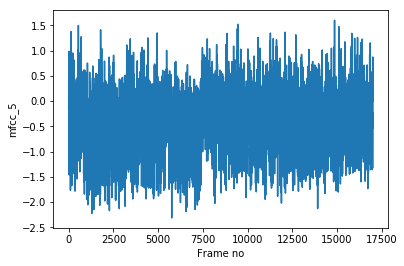

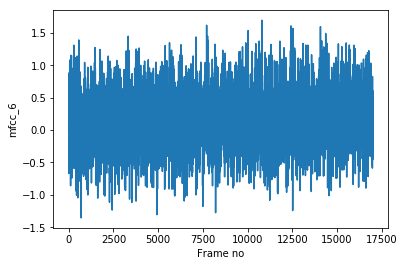

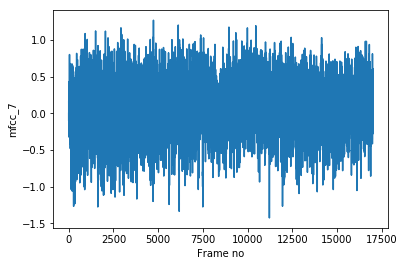

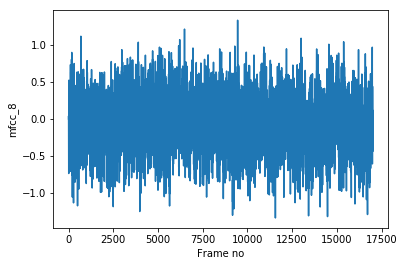

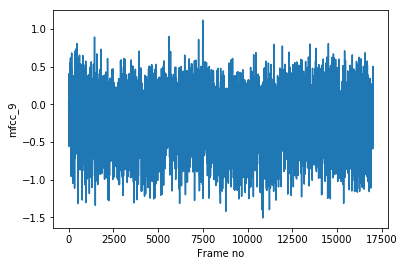

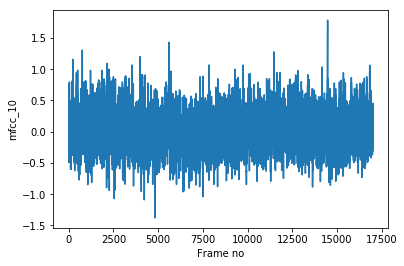

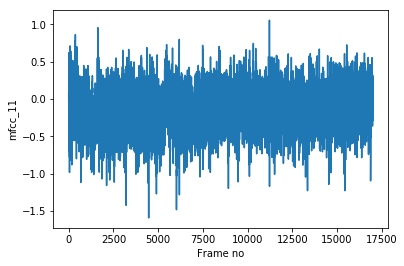

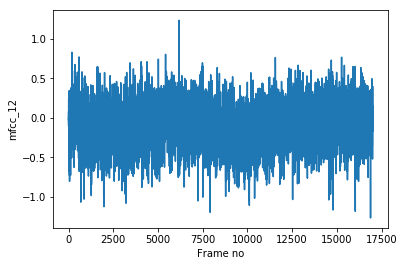

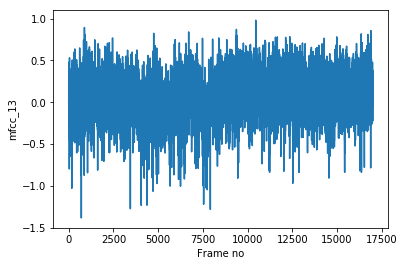

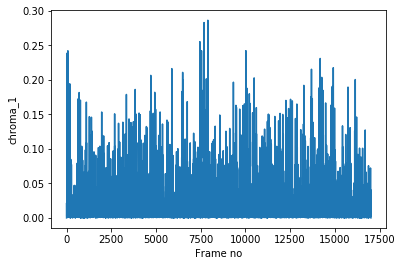

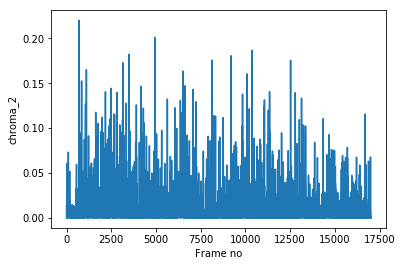

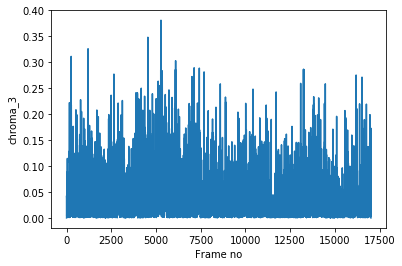

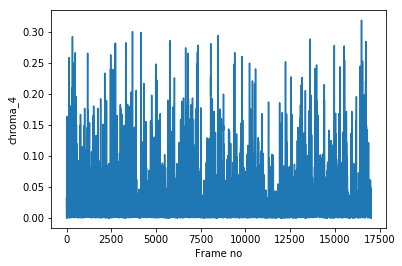

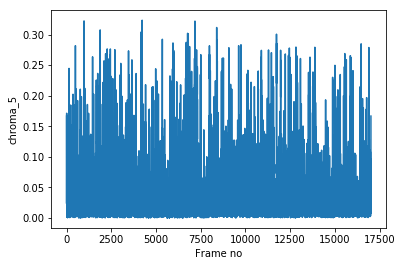

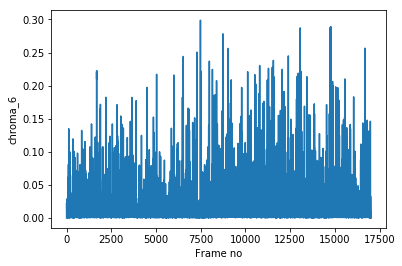

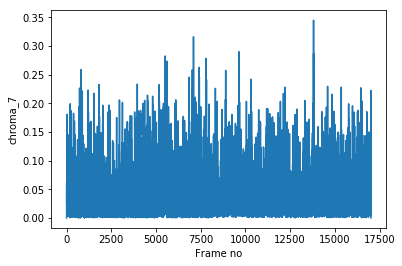

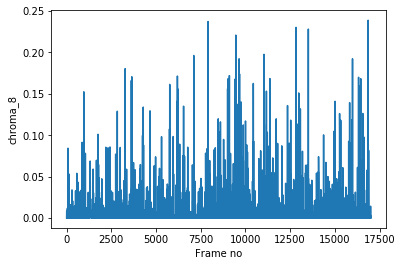

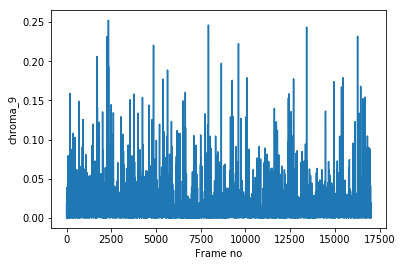

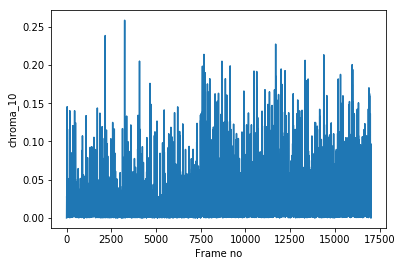

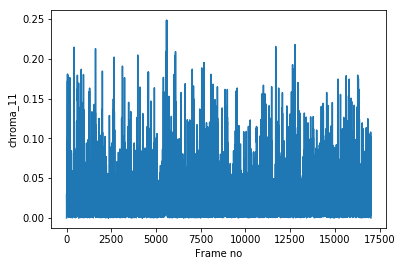

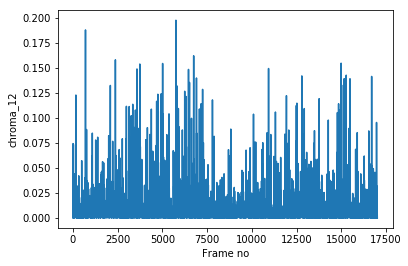

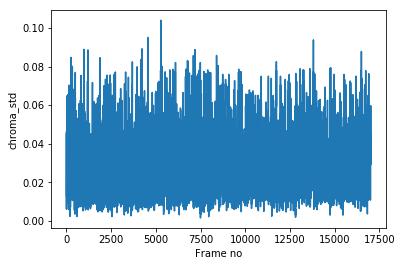

In [13]:
for i in range(len(f_names)):
    plt.plot(F[i,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[i]);
    plt.show();

In [5]:
# for i in range(len(f_names_tekking)):
#     plt.plot(F_tekking[i,:]); plt.xlabel('Frame no'); plt.ylabel(f_names_tekking[i]);
#     plt.show();

In [7]:
import pandas as pd

tekking = pd.DataFrame(data=F_tekking.reshape(F_tekking.shape[1], F_tekking.shape[0]), columns = f_names_tekking)
tekking["id"] = 0
display(tekking.head())

aubrey = pd.DataFrame(data=F.reshape(F.shape[1],F.shape[0]), columns = f_names)
aubrey["id"] = 1
display(aubrey.head())


,zcr,energy,energy_entropy,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,mfcc_1,mfcc_2,...,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,chroma_12,chroma_std,id
0,0.011343,0.029946,0.034483,0.034483,0.034483,0.031307,0.029492,0.024047,0.016334,0.019510,...,0.028584,0.029946,0.027223,0.020871,0.017695,0.014973,0.017695,0.022232,0.024047,0
1,0.024955,0.025862,0.021779,0.019964,0.021325,0.043103,0.212795,0.385209,0.301724,0.164247,...,0.312613,0.199183,0.074864,0.030853,0.021779,0.014519,0.069419,0.301270,0.494555,0
2,0.519510,0.530399,0.498639,0.504537,0.376134,0.112976,0.019510,0.019510,0.019964,0.026316,...,0.038566,0.105717,0.345281,0.528131,0.534029,0.551724,0.533122,0.342105,0.142468,0
3,0.068512,0.032214,0.028131,0.029946,0.042650,0.176044,0.345735,0.204174,0.012704,0.013612,...,0.028584,0.020417,0.026316,0.031307,0.048094,0.127949,0.260436,0.357532,0.418784,0
4,0.425136,0.349819,0.174682,0.039927,0.034936,0.029038,0.027677,0.024955,0.069873,0.321234,...,0.012704,0.013158,0.023593,0.034029,0.045372,0.053539,0.038566,0.023593,0.019510,0


,zcr,energy,energy_entropy,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,mfcc_1,mfcc_2,...,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,chroma_12,chroma_std,id
0,0.000000,0.002722,0.033575,0.049456,0.037659,0.031307,0.028584,0.036298,0.040835,0.058076,...,0.035390,0.023593,0.021325,0.021325,0.014519,0.022232,0.026316,0.055808,0.122505,1
1,0.113884,0.050817,0.034029,0.096642,0.166062,0.102541,0.026316,0.026770,0.024501,0.022232,...,0.017695,0.016788,0.014065,0.017695,0.024501,0.017695,0.014519,0.019964,0.015426,1
2,0.040381,0.062613,0.034483,0.014065,0.014065,0.013612,0.010436,0.014065,0.044465,0.074864,...,0.021325,0.028584,0.032214,0.032214,0.030853,0.026770,0.019510,0.015426,0.042650,1
3,0.049002,0.022232,0.014519,0.018603,0.026316,0.024047,0.019510,0.027677,0.034483,0.028584,...,0.026770,0.024955,0.029038,0.032668,0.035390,0.034029,0.024955,0.064882,0.113430,1
4,0.066697,0.017241,0.015880,0.014973,0.012250,0.012250,0.016334,0.016334,0.031307,0.089837,...,0.037205,0.035390,0.038113,0.037659,0.024955,0.018603,0.016788,0.046279,0.133394,1


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture

merged = pd.concat([tekking, aubrey])
X = merged.iloc[:, [0, 1, 3, 7]]
y = merged.iloc[:, -1]
gmm = GaussianMixture(n_components=2, random_state = 0)
gmm.fit(X)
# for i in gmm.predict(X):
#     print(i)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
clf.fit(X, y)

In [2]:
import pafy
url = "https://www.youtube.com/watch?v=As1OLXZI-pY"
video = pafy.new(url)
print("Title: ", video.title)
print("Rating: ", video.rating)
print("View Count: ", video.viewcount)
print("Author: ", video.author)
print("Video Length", video.length)
print("Likes: ", video.likes, "Dislikes: ", video.dislikes)

audiostreams = video.audiostreams
for a in audiostreams:
    print(a.bitrate, a.extension, a.get_filesize())

#audiostreams[4].download()

Title:  Aubrey de Grey - Immortality Timeframe
Rating:  None
View Count:  4056
Author:  Aging Reversed
Video Length 425
Likes:  172 Dislikes:  2
